In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/combined_cleaned_data/combined_with_fe.csv')
df.head()

C:\Users\Admin\anaconda3\envs\capstone\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_clean,sentiment
0,0,0,5,True,"09 24, 2013",A3CZ890UHC8HHZ,B0009RF9DW,{'Size:': ' 6.6 oz'},Amazon Customer,"It diffuses a very mild light perfume, just wh...",What I expected,1379980800,NaN,NaN,wear mild perfume nice strong lotion day perfu...,Positive
1,1,1,5,False,"07 12, 2014",A125TMC44CJBKK,B0012Y0ZG2,{'Size:': ' B-020'},Mustang Shelly,All time favorite!!!! Wish they still carried ...,Five Stars,1405123200,NaN,NaN,time still favorite carry wish,Positive
2,2,2,5,True,"12 28, 2014",A3JDSBP01M7R2R,B0012Y0ZG2,{'Size:': ' 112'},Tim A. Brooks,One of my wife's favorites.,Five Stars,1419724800,NaN,NaN,one favorites wife's,Positive
3,3,3,5,True,"03 3, 2014",A2HT5WENL8E5S6,B000FI4S1E,NaN,Shasta Masser,If you have body acne this product is a must. ...,Acne Body Wash A MUST,1393804800,NaN,NaN,heal help within prevent already first wash mu...,Positive
4,4,4,5,False,"11 7, 2014",A7LAYX9R7IMOO,B0012Y0ZG2,{'Size:': ' 123'},andre luiz,I really is what I expected,Five Stars,1415318400,NaN,NaN,expect really,Positive


In [3]:
df.drop(df.columns[[0, 1]], axis = 1, inplace=True)

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_clean,sentiment
0,5,True,"09 24, 2013",A3CZ890UHC8HHZ,B0009RF9DW,{'Size:': ' 6.6 oz'},Amazon Customer,"It diffuses a very mild light perfume, just wh...",What I expected,1379980800,NaN,NaN,wear mild perfume nice strong lotion day perfu...,Positive
1,5,False,"07 12, 2014",A125TMC44CJBKK,B0012Y0ZG2,{'Size:': ' B-020'},Mustang Shelly,All time favorite!!!! Wish they still carried ...,Five Stars,1405123200,NaN,NaN,time still favorite carry wish,Positive
2,5,True,"12 28, 2014",A3JDSBP01M7R2R,B0012Y0ZG2,{'Size:': ' 112'},Tim A. Brooks,One of my wife's favorites.,Five Stars,1419724800,NaN,NaN,one favorites wife's,Positive
3,5,True,"03 3, 2014",A2HT5WENL8E5S6,B000FI4S1E,NaN,Shasta Masser,If you have body acne this product is a must. ...,Acne Body Wash A MUST,1393804800,NaN,NaN,heal help within prevent already first wash mu...,Positive
4,5,False,"11 7, 2014",A7LAYX9R7IMOO,B0012Y0ZG2,{'Size:': ' 123'},andre luiz,I really is what I expected,Five Stars,1415318400,NaN,NaN,expect really,Positive


In [5]:
df.drop(['reviewTime', 'asin', 'style', 'reviewerName', 'unixReviewTime', 'vote', 'image'], axis=1, inplace=True)

In [6]:
df['review_clean']

0        wear mild perfume nice strong lotion day perfu...
1                           time still favorite carry wish
2                                     one favorites wife's
3        heal help within prevent already first wash mu...
4                                            expect really
                               ...                        
73619    think guide go acela maybe i've realize star t...
73620                                                 good
73621                         great quality price good job
73622    point else sense code point good make worked g...
73623    reason buy buy something madden great already ...
Name: review_clean, Length: 73624, dtype: object

In [7]:
import matplotlib.pyplot as plt
from textblob import Word
import wordcloud

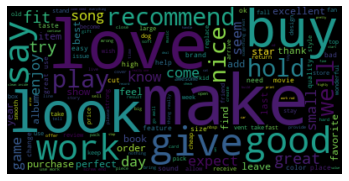

In [8]:
# common_words=''
# for i in df.review_clean:
#     i = str(i)
#     tokens = i.split()
#     common_words += " ".join(tokens)+" "
# wordcloud = wordcloud.WordCloud().generate(common_words)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Encoded the target column
lb=LabelEncoder()
df['sentiment'] = lb.fit_transform(df['sentiment'])

In [11]:
df.head()

,overall,verified,reviewerID,reviewText,summary,review_clean,sentiment
0,5,True,A3CZ890UHC8HHZ,"It diffuses a very mild light perfume, just wh...",What I expected,wear mild perfume nice strong lotion day perfu...,1
1,5,False,A125TMC44CJBKK,All time favorite!!!! Wish they still carried ...,Five Stars,time still favorite carry wish,1
2,5,True,A3JDSBP01M7R2R,One of my wife's favorites.,Five Stars,one favorites wife's,1
3,5,True,A2HT5WENL8E5S6,If you have body acne this product is a must. ...,Acne Body Wash A MUST,heal help within prevent already first wash mu...,1
4,5,False,A7LAYX9R7IMOO,I really is what I expected,Five Stars,expect really,1


In [12]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [13]:
from nltk.tokenize import word_tokenize 

In [14]:
df.review_clean = df.review_clean.astype(str)

In [20]:
df.head()

,overall,verified,reviewerID,reviewText,summary,review_clean,sentiment
0,5,True,A3CZ890UHC8HHZ,"It diffuses a very mild light perfume, just wh...",What I expected,wear mild perfume nice strong lotion day perfu...,1
1,5,False,A125TMC44CJBKK,All time favorite!!!! Wish they still carried ...,Five Stars,time still favorite carry wish,1
2,5,True,A3JDSBP01M7R2R,One of my wife's favorites.,Five Stars,one favorites wife's,1
3,5,True,A2HT5WENL8E5S6,If you have body acne this product is a must. ...,Acne Body Wash A MUST,heal help within prevent already first wash mu...,1
4,5,False,A7LAYX9R7IMOO,I really is what I expected,Five Stars,expect really,1


In [23]:
df.dtypes

overall          int64
verified          bool
reviewerID      object
reviewText      object
summary         object
review_clean    object
sentiment        int32
dtype: object

In [22]:
df.review_clean = df.review_clean.astype(str)

In [24]:
corpus = df['review_clean'].tolist()

In [25]:
corpus

['wear mild perfume nice strong lotion day perfumes shalimar want light want diffuse lotion purchasing hint',
 'time still favorite carry wish',
 "one favorites wife's",
 'heal help within prevent already first wash must body week use chest acne product difference notice back reoccurring',
 'expect really',
 'well great lather smell',
 'give italy day year transform beautiful spent spa soon hard treat experience take cream find disappointed since fragrance feel must smooth like say get dear word shower live friend buy skin use one ago try completely love luxurious relax',
 "seven product plastic fading lavendar heat amount quite scent natural quantity resealable potency sell delicate however dry decant oil smell stain come product think presentation open strike concentrate aspect generous important location overbear review enough opening seem intrinsic something careful note make act different packet mine potent sachet extract good long find spill fairly cloy really jar bag help messy 

In [26]:
type(corpus)

list

In [53]:
features = (df.review_clean.str.split(expand=True).stack().value_counts() > 750).value_counts()
features

False    72796
True       503
dtype: int64

In [55]:
features[1]

503

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tfidf = TfidfVectorizer(max_features=750)       # taking 500 unique words by highest frequency

In [47]:
X = tfidf.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [48]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
print(X.dtype)
print(y.dtype)

float64
int32


In [51]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [52]:
print(X.size)
print(y.size)

55218000
73624


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [58]:
max_features = features[1].item()

In [59]:
type(max_features)

int

In [64]:
model = Sequential()
model.add(Embedding(max_features, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

NotImplementedError: Cannot convert a symbolic Tensor (lstm_1/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported